## Particle Mover GANs & Adaptible Universal Distribution Generators

Author: [Kai Londenberg](Kai.Londenberg@googlemail.com) - 2018

The recent success story of WGAN models for learning deep generative models is based on a certain formulation of adversarial training which can be interpreted as the minimization of the Wasserstein Distance $ W $ , also known as Earth-Mover Distance between a parametric generated distribution $ P_{\theta} $ and a fixed empirical distribution $ P_r $.

$ P_{\theta} $ in the context of recent generative models such as GAN and VAE variants is usually generated by sampling a continuous random vector $ Z $ from a known probability distribution, and transforming the generated samples using a trainable  neural network function $ g_\theta $ so that $ P_\theta = g_\theta(Z) $ 

The learning objective in this context is to **learn a distribution** via minimization of some kind of distance or divergence between $ P_r $ and $ P_\theta $. We will call this distance function $ d(P_r, P_\theta) $

[Martin Arjovsky, Soumith Chintala and Léon Bottou showed](https://arxiv.org/abs/1701.07875) that the choice of this distance function, with the most common choice being the KL-Divergence, is of paramount importance for the ability of a gradient-based optimization method to succeed in letting $ P_\theta $ converge towards $ P_r $ as the training optimizes the objective $ \min_{\theta} d(P_r, P_\theta) $

In this context, they proved that the minimization of the so-called Wasserstein Distance $ W $, also known as Earth-Mover Distance is ideal, for reasons detailed below.  

To introduce the Wasserstein Distance, we define $ \prod(P_\theta,P_r) $ as the set of all joint distributions $ \lambda $ whose marginal distributions are $ P_\theta $ and $ P_r $ respectively. Then the Earth-Mover or Wasserstein Distance is defined as

$$
W(P_\theta, P_r) = \inf_{\lambda \in \prod(P_\theta,P_r)} \mathbb{E}_{(x,y) \sim \lambda}[\parallel x-y \parallel]
$$

This has been described as a measure of how much probability mass would need to be moved at minimum to convert one distribution to the other. Therefore the name Earth-Mover distance. See [Wasserstein GAN Read Through](https://www.alexirpan.com/2017/02/22/wasserstein-gan.html) for a good explanation.

The Wasserstein Distance is very important, given that the paper also provided proofs that under some mild conditions:

 * If $ P_\theta $ is a smooth function of $ \theta $, then $ W(P_\theta, P_r) $ is also smooth over $ \theta $.
 * The above is not generally true for KL-Divergence and other Divergences or distribution distance metrics.
 * $ W(P_\theta, P_r) \rightarrow 0 $ implies convergence in probability of $ P_\theta$ and $ P_r $ 
 *  Consequently, $ W(P_\theta, P_r) \rightarrow 0 $ implies $ KL(P_\theta, P_r) \rightarrow 0 $ and $ {KL}(P_r, P_\theta) \rightarrow 0 $.
 

In general, the Wasserstein distance cannot be calculated exactly. So we need to approximate it, and the WGAN paper describes a way of how to achieve this with great experimental results by exploiting the so called [Kantorovich-Rubinstein duality](https://en.wikipedia.org/wiki/Wasserstein_metric#Dual_representation_of_W1) of the Wasserstein metric.

This can be achieved by a slight alteration of GAN training. The subsequent training algorithm, called a WGAN has been experimentally evaluated (and further refined in subsequent papers) to great success,

The planned contribution of this paper is to develop an alternative and maybe more easily applicable method to achieve the same goal, without the necessity (but with possibility) of adversarial training, with potential applicability to mixed discrete and continuous distributions (so Z may be completely or partially discrete and might even have an intractable density), and with the potential to solve the mode collapse problem of GAN training.

The idea has been strongly influenced by the Paper [Wang Q Kulkarni S Verdú S: A Nearest-Neighbor Approach to Estimating Divergence between Continuous Random Vectors](https://www.princeton.edu/~verdu/nearest.neigh.pdf) 

#### Density Estimate of a Multivariate Random Variable over a Latent Manifold Probability Space with Distance Metric.

The following is an extension of the approach of [D. O. Loftsgaarden, C. P. Quesenberry: A nonparametric estimate of a multivariate density function](https://projecteuclid.org/euclid.aoms/1177700079) to the notion of a latent manifold support space and smooth but potentially nonlinear distance function. 

Let $P_x$ be a random variable with range $ \mathbb{R}^q $ and $ \{ x_i\}_{i=1}^{n} $ be a list of i.i.d, samples with $ x_i \sim P_x $. Furthermore, let $ d: (\mathbb{R}^q,\mathbb{R}^q)  \mapsto [ 0, \infty ) $  be a smooth and differentiable function, which we will call the natural distance function and assume to be given or learnable. 

We assume the random variable $P_x$ to be functionally related to this natural distance function in the sense that the distance functionally relates to the probability measure of the probability space underlying $ P_x $.

This relation can be specified as follows. We assume that the natural distance function internally maps two points on space $ \mathbb{R}^q $ to a latent manifold $ \mathbb{A} $ and then computes their distance on that space. Therefore, we introduce mapping $ m : \mathbb{R}^q \mapsto \mathbb{A} $ and latent distance metric $ d_A : \mathbb{A}x\mathbb{A} \mapsto [ 0, \infty ) $ and define $ d(x_i,x_j) = d_A(m(x_i), m(x_j)) $. We also define the inverse mapping $ s : \mathbb{A} \mapsto \mathbb{R}^q $ with $ m := s^{-1} $. We call $ \mathbb{A} $ the *latent support space*.

We further assume existence of measure $ \mu(A) $ over $ A \subseteq \mathbb{A} $ which is partially determined by $ d_A $. We define $ \mu_P(A) = \frac{\mu(A)}{Z} $ to be a normalized probability measure based on $ \mu $, e.g. we define $ Z = \mu(\mathbb{A}) $. Note that $ Z $ is considered to be unknown. 

The triplet $ (\mathbb{A}, \mathbb{B}_A, \mu_P ) $ could already form a probability space with $ \mathbb{B}_A $ being the Borel-Sets of $ \mathbb{A} $. 

Being a manifold, $ \mathbb{A} $ can be considered [locally w-euclidean](https://topospaces.subwiki.org/wiki/Locally_Euclidean_space) with  unknown but finite dimensionality $ w $. 

As such, we assume that within the $ \epsilon $ neighbourhood of any point $ a_i \in \mathbb{A} $, the following property holds:

$
\forall r <= \epsilon: A(a_i,r) := \{ a ; d_A(a,a_i)<r \} \Rightarrow \mu(A(a_i,r)) \approxeq V_w(r) \Leftrightarrow \mu_P(A(a_i,r)) \approxeq \frac {V_w(r)}{Z}
$

where $ V_w(r) $ is the volume of a hypersphere in $ \mathbb{R}^w $ given it's radius. Note that $ A(a_i,r) \in \mathbb{B}_A$ since it is an open set.

That is, we assume the measure $ \mu(A) $ to be locally approximated by the volume of a w-dimensional hypersphere around point $ a_i $ with a radius defined over the metric $ d_A $ as long as we stay within an $\epsilon$-neighbourhood.

The intuition being, that measures can be considered to be a generalization of the concept of volume in 3 dimensional euclidean space. We can therefore derive an unnormalized probability measure (intuitively *volume in our probability space*) from our metric (intuitively *distance in our probability space*).

#### Decoupling Distances & Probability Mass

The problem with this approach so far is, that in this probability space, the probability of an event is inherently tied to the degrees of freedom on the *support space*, which we can intuitively think of as the space of *imaginable states*. It is, among other things, not possible to have probability zero for different *imaginable states*, unless they also have a distance of zero. But if they have a distance of zero, they can hardly be considered different.

So let's modify our probability measure accordingly. Let us define another function, $ b : \mathbb{A} \mapsto [ 0, \infty ) $ which serves the following purpose. We can imagine $ \mathbb{A} $ to be a potentially crumpled sheet (aka. 2D manifold in 3D-space) of imaginable latent states, then $ b(a) $ can be thought of as the thickness of this sheet at point $ a \in \mathbb{A} $. If we then want to calculate the probability of a subset (aka arbitrary slice) of this sheet, we need to measure the volume of this subset.

We therefore define a new (hyper-)volumetric measure $ \beta $ for the $ \epsilon $-neighbourhood of any point $ a_i \in \mathbb{A} $:

$
\forall r <= \epsilon: A(a,r) := \{ a_i ; d_A(a,a_i)<r \} \Rightarrow \beta(A(a,r)) = \int_{A(a,r)} b(\hat{a}) d\hat{a}
$

Intuitively, this corresponds to the volume of a circular slice from a sheet of variable thickness. From this we can derive a new normalized measure $ \beta_P $ by defining $ Z_b = \beta(\mathbb{A}) $ and $ \beta_P(A) = \frac{\beta(A)}{Z_b} $
so that we arrive at a new probability space defined by the triplet $ ( \mathbb{A}, \mathbb{B}_A, \beta_P ) $.

##### Back to our sample space

If we define the set of an hypersphere around point x with radius r as $ H(x,r) := \{x : x \in \mathbb{R}^q \land d(x_i,x)<r \} $ and equate $ P_x(X \subseteq \mathbb{R}^q ) := \beta_P(m(X \subseteq \mathbb{R}^q )) $, for any $ \epsilon$-neighbourhood of $ x_i $ we can set:

$$
P_x(H(x_i,d(x_i,x_j)) := \beta_P(m(H(x_i,d(x_i,x_j)))) 
$$



We can furthermore define the density of $P_x$ as $$ p_x(x) = \lim_{r \rightarrow 0} \frac{P_x(H(x_i,r))}{V_w(r)} = \lim_{x_j \rightarrow x_i} \frac{P_x(H(x_i,d(x_i, x_j))}{V_w(r)} $$ 

If we sample $ \{ x_i \}_{i=1}^n $ i.i.d with all $ x_i \sim P_x $ the expected number of samples with $ d(x, x_i) \lt r \leq\epsilon $ around an arbitrary point x can be calculated as

$$
E[\vert\{ x_i : d(x, x_i)<=r\}_{i=1}^n\vert] = P_x(H(x,r)) \cdot n 
$$

We can estimate the average density p_x(x) in the neighbourhood of x via the expression

$$
\hat{p}_x(x,r) = \frac{\vert\{ x_i : d(x, x_i)<=r\}_{i=1}^n\vert}{n \cdot  V_w(r)} 
$$


This estimate converges almost surely to the true density p_x(x) for $ n \to \infty $, $ r \to 0 $ given that for every $ r > 0 $ we can pick an $ n $ large enough to make the estimation error of $ p_x$ arbitrarily unlikely to exceed an arbitrarily small threshold if the local approximation of $ P_x(H(x,r)) $ is accurate. By simultaneously letting $ r \to 0 $ (for example with $ r = \frac{1}{\sqrt{n}}$ ) we drive the error introduced by the local approximation of $ P_x(H(x,r)) $ to zero as well. 

$$
E[\hat{p}_x(x,r)] =
\lim_{n \to \infty } \frac{P_x(H(x,n^{-\frac{1}{2}})) \cdot n}{n \cdot V_w(n^{-\frac{1}{2}})} = \lim_{r \rightarrow 0} \frac{P_x(H(x_i,r))}{V_w(r)} = p_x(x)
$$

It is important to note that for a given, finite number $n $ of samples, the quality of the estimate in a certain region depends on the expected number of samples falling into the $ \epsilon $ - neighbourhood of each other. 

#### Varying degrees of freedom

We have for now assumed $ w $ to be a positive constant, but a variant of the above approach is imaginable where $ w $ might vary smoothly or maybe even abruptly in $ \mathbb{A} $ as long as it stays approximately constant within any $ \epsilon $ neighbourhood of any point a (or x) with positive probability mass.

#### Single Distribution Summary

In summarization, we have a theoretical model which allows us to nonparametrically estimate the probability density and local probability measure, given a source of samples from a vector-valued probability distribution $ P_x $ (which needs to exist, even though we might not be calculate a normalization constant) with respect to a smooth distance metric d which is defined over a latent space. We do not assume the probability density itself to be smooth.

#### Notational Conventions

Before we can start writing about multiple distributions, we will introduce a few **notational conventions**.

The characters a, b, x, y and z if used as subscripts will not mean indices, but rather be considered labels, associating variables, function or sets into certain groups. If not used as subscripts, they are considered to be vector-valued variables. In their uppercase variants (A,B,X,Y,Z) they will refer to sets. 

Subscripts i, j and u will be used for indexing. The characters n and m will be used to specify sizes of sets or lengths of sequences.

We will use the notation $ P_x $ or $ P_x(\Theta_x) $ to mean a probability distribution $ P_x $, potentially adaptable by modifying a set of parameters $ \Theta_x $ of an underlying generative model.

Equivalently, we will use the notation $ d_{x}$ or $ d_{x}(\theta_x) $ to mean the distance metric for distribution $ P_x $, potentially parameterized by $ \theta_x $ of a distance model. We can also, for example, write, $ d_x(x_1, x_2, \theta_x) $ if we use it to calculate the distance between points $ x_1 $ and $x_2$.

In the following, the *support space* of $ P_x $ will be denoted by $ \mathbb{A}_x^{w_x} $, with $ w_x $ meaning the dimensionality of the support space of $ P_x $. Equivalently, the sample space of $ P_x $ will be assumed to be $ \mathbb{R}^{q_x} $ with $ q_x $ specifying the corresponding dimensionality.

The function $ m_x: \mathbb{R}^{q_x} \mapsto \mathbb{A}_x^{w_x} $ will mean the (potentially unknown) function mapping a point on the sample space to the latent support space, while $ s_x: \mathbb{A}_x^{w_x} \mapsto \mathbb{R}^{q_x} $ will describe the inverse mapping, i.e. $ m_x = s_x^{-1} $

#### Compatible & Convertible Distributions

When talking about divergences and distances between distributions, we might first need to introduce some general idea of what this might mean. Distributions $ P_x $ and $ P_y $ might be defined over the same sample space (e.g. $ q_x = q_y $ ), they might share the same latent support space $ \mathbb{A}_x = \mathbb{A}_y $ and they might share the same distance function, in which case $ d_x = d_y $. 

If two distributions share sample space and distance function, we will call them **compatible distributions**. Note that this implies $ \mathbb{A}_x = \mathbb{A}_y $. In the context of compatible distributions, we might drop some subscripts, e.g $ d = d_x = d_y $, $ q = q_x = q_y $ and $ \mathbb{A} = \mathbb{A}_x = \mathbb{A}_y $.

If two distributions are not compatible, they might still be **convertible distributions**. Examples of convertible distributions can be taken from the [CycleGAN paper](https://arxiv.org/pdf/1703.10593.pdf), e.g. the distributions of horse images and zebra-images (which might be considered compatible if they share d), or even distributions of textual image descriptions and their renderings as images (which are definitely not compatible due to different sample spaces).

In the case of convertible distributions, we assume their latent support spaces to be subspaces of a larger latent support space. E.g. if $P_x$ and $P_y$ are convertible, then $  \mathbb{A}_x \subseteq \mathbb{A} \land \mathbb{A}_y \subseteq \mathbb{A} $ where we assume that no trivial independent solution like $ \mathbb{A} = \mathbb{A}_x x \mathbb{A}_b $ is chosen, instead we should strive to maximize potential mutual information via this mapping (for example by optimizing for cycle consistency, see below).

We might then be able to find a unified distance function $ d $ between elements of their sample spaces and/or find **conversion** mappings capable of converting an element from one population into a set of one or more close elements of a compatible target population. If this conversion is at least approximately invertible, we will talk about **cycle consistent convertible distributions**. 

If we want to make distributions $ P_x $ and $ P_y$ as similar as possible, and have an mutual information maximizing conversion mapping between $ P_x $ and $ P_z$ available, where $ P_x $ and $ P_z$ are compatible, then we can convert the problem of making $P_x$ and $P_y$ as similar as possible into the problem of making compatible distributions $ P_x $ and $P_z$ as similar as possible.

#### Local & Global Distribution Adaptation

When considering an adaptible distribution generator $ P_x(\Theta_x) $, it is important to distinguish between two different ways in which the probability density at and around a point $ x_i $ could be adapted.

First, we might want to update the parameters of the model in such a way as to drive away or pull in probability mass from point $ x_i $ to or from point $ x_j $ with respect to a **certain direction** $ \nabla d(x_i, x_j) $ along the gradient of the distance metric, or if interpreted differently to move probability mass within the local $ \epsilon$-neighbourhood on the **support space**. We will call this approach **local distribution adaptation**

On the other hand, if moving probability mass between $ x_i $ and $ x_j $ which are far from each other ( e.g. not within an $ \epsilon $-neighbourhood of each other), we might prefer not to trust gradients, and instead prefer to *pick up* probability mass from the region around one point and *put it down* around another point on the support space. We will call this approach **global distribution adaptation**.

##### Smooth Distribution Generators

Generative (sub-)models in the context of GANs and Variational Autoencoders are usually modeled as deterministic functions which distort a source of random noise following a well understood distribution, such as a number of independent gaussians.

We will usually use a smooth and differentiable universal function approximator to distort this noise (e.g. a neural network). But there is one downside. If the noise is smooth, and the function is smooth, the output is smooth as well. In order to approximate discrete target distributions or functions well, they have to resort to extremely nonlinear behaviour at certain boundaries, which can even lie in the middle of highly probable areas within the space of underlying latent noise. 

These models can be made to approximate discrete distributions well, but remain smooth in nature (up to their numerical accuracy).

Models based on underlying smooth noise usually resort to variants of **local distribution adaptation** (i.e. gradient updates).

##### Discrete Distribution Generators

If, on the other hand, the noise is exclusively discrete, the output of these models is discrete as well. Examples of generative models following this approach would be Stochastic Neural Networks, for example, Restricted Boltzmann Machines (RBMs) over Binary Units, Deep Belief Networks ( i.e. Stacked Binary RBMs) or Dropout as Variational Inference as in [Yarin Gal: Dropout as a Bayesian Approximation](https://arxiv.org/pdf/1506.02142.pdf) and it's followup publications.

These models can be made to approximate continuous distributions with a very high number of potential discrete states. This can obtain a high accuracy as well. For example, if we have n binary units or neurons, we can have up to 2^n distinguishable outputs, each with an attached numerical value.

Models based on underlying discrete noise can more easily resort to variants of global distribution adaptation, but most often also use local adaptation ( Normal gradient updates in MC-Dropout, (Persistent-) Contrastive Divergence. The Wake-Sleep Algorithm uses a combination of both local and global updates, which allows him to learn mixed discrete and continuous distributions.

##### Mixture Distribution Generators

The most popular mixture models are probably Gaussian Mixture Models ( GMMs) and their nonparametric infinite-dimensional variant Dirichlet Process Gaussian Mixture Models (DPGMM). Gaussian Mixture Models with unlimited mixture components are Universal Distribution Approximators. The only problem being, that they require a potentially enormous number of parameters and therefore don't neccessarily generalize well, unless the data itself can be well modeled by a small number of their mixture components.

##### Universal Distribution Generators

If the Generator is a Neural Network which distorts a source of both discrete and smooth noise, it can be considered an Universal Mixture Model, given that it can use the discrete noise to direct probability mass to arbitrary disconnected points on the output space, and use the smooth noise to vary smoothly around these points with arbitrarily shaped distribution shapes.

Such a Neural Network could also resort to a weight-sharing strategy in order to keep a good balance between the ability to generalize and it's expressiveness and capacity.

Without having to fix the specifics of the architecture of such a model now, it is of **crucial importance that the used learning strategy allows for both local and global distribution adaptation**.

One potential way to do this, would be to embed Stochastic Neural Network Modules within a larger network. (e.g. as independent subnetworks with different learning strategy). We will try several variants of this in the Experimental Section.

### Mini-Batch Wasserstein Distance Estimator

We will now construct a Mini-Batch estimator for the Wasserstein distance. We will recall the definition:

Define $ \prod(P_x,P_y) $ as the set of all joint distributions $ \lambda $ whose marginal distributions are $ P_x $ and $ P_y $ respectively. Then the Earth-Mover or Wasserstein Distance is defined as

$$
W(P_x, P_y) = \inf_{\lambda \in \prod(P_x,P_y)} E_{(x,y) \sim \lambda}[d(x,y)]
$$

We assume $ P_x $ and $ P_y $ to be compatible (in the sense described in the section above) and able to generate finite lists of samples with point density estimates available for both distributions at each of the samples. 

In the following we assume existence of a list of samples $ \{ x_i \}_{i=1}^n ; x_i \sim P_x(\Theta_x) $  and correspondingly another list of samples $ \{ y_j \}_{j=1}^m ; y_j \sim P_y $ where $ P_x(\Theta_x) $ plays the role of an adaptible distribution parametrized by $ \Theta_x $ and $ P_y $ plays the role of a fixed target distribution.

We can precompute pointwise densities and the matrix of pairwise distances between samples. After proper normalization of the pointwise densities, we can then treat the densities as discrete probability mass and [compute the exact discrete solution of the Earth Mover Distance](https://en.wikipedia.org/wiki/Earth_mover%27s_distance#Computing_the_EMD). 

This requires solving the so called Transportation Problem and can be done in polynomial time. In Python, there is at least one implementation available as part of the MIT Licensed [Python Optimal Transport Library by Rémi Flamary and Nicolas Courty](https://github.com/rflamary/POT) 

For each combination of samples $ (x_i, y_j ) $ we obtain a score $ v(i,j) $ which specifies how much probability mass would have to move from sample $ x_i $ to $ y_j $ or the other way around. 

We will adopt a combination of **local distribution adaptation** and **global distribution adaptation** to achieve this, depending on distance between the samples.







### Experiments



In [1]:
import torch # pytorch, see pytorch.org
import torch.nn as nn
from torch.optim import Adam, SGD
from torch.autograd import Variable
from torch.nn.utils.clip_grad import clip_grad_norm
import numpy as np
import matplotlib.pylab as plt
import ot # Python Optimal Transport Library ( conda install -c conda-forge pot )
import scipy.stats as scistats
import probtorch # Probtorch, see https://github.com/probtorch/probtorch - pip install git+https://github.com/probtorch/probtorch

In [2]:
from pmgan.pmgan_experiments import TargetMixture, SimpleParametricSampler

In [3]:
P_y = TargetMixture([0.3, 0.2, 0.35, 0.15], [scistats.beta(1,7), scistats.beta(20,1), scistats.norm(4, 0.7),
                                             scistats.binom(p=0.7, n=10)])

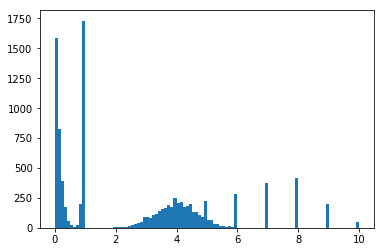

In [4]:
plt.hist(P_y(10000).data.numpy()[:, 0], bins=100)
plt.show()

In [5]:
import math
loss = nn.MSELoss()
model = SimpleParametricSampler(10, 1)
model.train()

SimpleParametricSampler(
  (network): Sequential(
    (0): Linear(in_features=10, out_features=50, bias=True)
    (1): Dropout(p=0.2)
    (2): LeakyReLU(0.01)
    (3): Linear(in_features=50, out_features=50, bias=True)
    (4): Dropout(p=0.2)
    (5): LeakyReLU(0.01)
    (6): Linear(in_features=50, out_features=50, bias=True)
    (7): Dropout(p=0.2)
    (8): LeakyReLU(0.01)
    (9): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [6]:

# opt = Adam(model.parameters())
# for i in range(1000):
#     opt.zero_grad()
#     target = P_y.forward(1000)
#     pred = model.forward(1000)
#     error = loss(pred, target)
#     error.backward()
#     opt.step()
#     print("RMSE: %.5f" % (math.sqrt(error[0])))

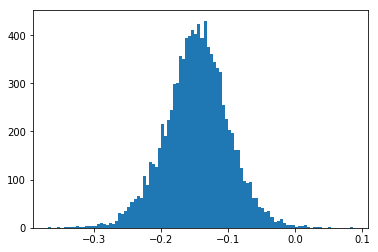

In [7]:
plt.hist(model(10000).data.numpy()[:, 0], bins=100)
plt.show()

In [15]:
s1 = model(110)[:, 0]
s2 = P_y(100)[:,0]

In [16]:
from pmgan.pmgan_loss import WassersteinParticleMoverLoss, L2Distance


In [17]:
wloss = WassersteinParticleMoverLoss()
wloss.set_metric(L2Distance(), Variable(torch.FloatTensor([2.0]), requires_grad=False))

In [18]:
s1.shape

torch.Size([110])

In [19]:
wloss.set_samples(s1, s2)

In [ ]:
logd_x = np.array(wloss.log_density_xx + wloss.log_density_yx ) # Densities of samples of x and y in P_x
logd_y = np.array(wloss.log_density_xy + wloss.log_density_yy ) # Densities of samples of x and y in P_y

In [27]:
def to_tensor_mat(dmat):
    len1 = len(dmat)
    len2 = len(dmat[0])
    result = torch.FloatTensor(len1,len2)
    for i in range(len1):
        for j in range(len2):
            result[i,j] = dmat[i][j].data[0]
    return result
    

In [50]:
xr = torch.cat([to_tensor_mat(wloss.distances_xx), to_tensor_mat(wloss.distances_xy)], dim=1)
xr.size()

torch.Size([110, 210])

In [53]:
yr = torch.cat([to_tensor_mat(wloss.distances_yx), to_tensor_mat(wloss.distances_yy)], dim=1)
yr.size()

torch.Size([100, 210])

In [57]:
dmat = torch.cat([xr,yr],dim=0)
dmat.numpy()

array([[0.0000000e+00, 3.7336515e-03, 2.5345054e-05, ..., 1.2541083e-01,
        2.2827877e-02, 5.0919056e+01],
       [3.7336515e-03, 0.0000000e+00, 4.3742349e-03, ..., 1.7242217e-01,
        4.5025691e-02, 5.1794827e+01],
       [2.5345054e-05, 4.3742349e-03, 0.0000000e+00, ..., 1.2187047e-01,
        2.1331940e-02, 5.0847229e+01],
       ...,
       [1.2541083e-01, 1.7242217e-01, 1.2187047e-01, ..., 0.0000000e+00,
        4.1227240e-02, 4.5990437e+01],
       [2.2827877e-02, 4.5025691e-02, 2.1331940e-02, ..., 4.1227240e-02,
        0.0000000e+00, 4.8785610e+01],
       [5.0919056e+01, 5.1794827e+01, 5.0847229e+01, ..., 4.5990437e+01,
        4.8785610e+01, 0.0000000e+00]], dtype=float32)

In [60]:
dmat[120,121]

6.589057922363281

In [2]:
%matplotlib inline


## References

 * [Wang Q Kulkarni S Verdú S: A Nearest-Neighbor Approach to Estimating Divergence between Continuous Random Vectors](https://www.princeton.edu/~verdu/nearest.neigh.pdf)
 * [D. O. Loftsgaarden, C. P. Quesenberry: A nonparametric estimate of a multivariate density function](https://projecteuclid.org/euclid.aoms/1177700079)
 * [Martin Arjovsky, Soumith Chintala, Léon Bottou: Wasserstein GAN](https://arxiv.org/abs/1701.07875)
 * [Wasserstein GAN Read Through](https://www.alexirpan.com/2017/02/22/wasserstein-gan.html)
 

### Useful Links


 * [Wikipedia: Weak Convergence of Measures](https://en.wikipedia.org/wiki/Convergence_of_measures#Weak_convergence_of_measures)        
 * [Wikipedia: Random Variable](https://en.wikipedia.org/wiki/Random_variable)
 * [Wikipedia: Pushforward Measure](https://en.wikipedia.org/wiki/Pushforward_measure)
 * [Wikipedia: Radon Measure](https://en.wikipedia.org/wiki/Radon_measure)
 * [Wikipedia: Wasserstein Metric](https://en.wikipedia.org/wiki/Wasserstein_metric)
                                        
                                             
 